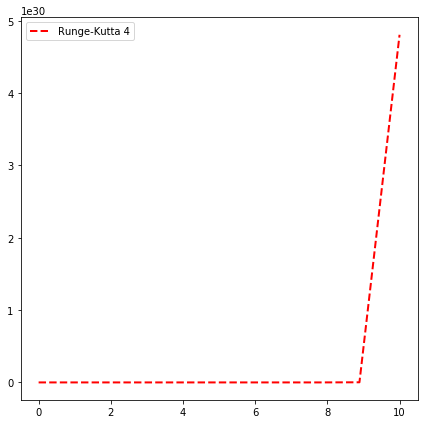

In [3]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

# function to solve second order ODE
fx = lambda v: v    #velocity

fv = lambda x,v: F/m-(2*zeta*omega*v)-((omega**2)*x)    #position

#function to solve dv/dt = F/m - 2*zeta*omega*v - (omega**2)*x
def rk4_x(x0,v0,h):
    K1_v = h*fx(v0)
    K1_x = h*fv(x0,v0)
    K2_v = h*fx(v0+K1_x*h/2)
    K2_x = h*fv(x0+K1_v*h/2,v0+K1_x*h/2)
    K3_v = h*fx(v0+K2_x*h/2)
    K3_x = h*fv(x0+K2_v*h/2,v0+K2_x*h/2)
    K4_v = h*fx(v0+K3_x*h)
    K4_x = h*fv(x0+K3_v*h,v0+K3_x*h)
    x = x0+(1./6)*(K1_v+2*K2_v+2*K3_v+K4_v)
    v = v0+(1./6)*(K1_x+2*K2_x+2*K3_x+K4_x)
    return x
   
#function to solve v = dx/dt
def rk4_v(v0,x0,h):
    K1_v = h*fx(v0)
    K1_x = h*fv(x0,v0)
    K2_v = h*fx(v0+K1_x*h/2)
    K2_x = h*fv(x0+K1_v*h/2,v0+K1_x*h/2)
    K3_v = h*fx(v0+K2_x*h/2)
    K3_x = h*fv(x0+K2_v*h/2,v0+K2_x*h/2)
    K4_v = h*fx(v0+K3_x*h)
    K4_x = h*fv(x0+K3_v*h,v0+K3_x*h)
    x = x0+(1./6)*(K1_v+2*K2_v+2*K3_v+K4_v)
    v = v0+(1./6)*(K1_x+2*K2_x+2*K3_x+K4_x)
    return v

a = 0.            #initial value for t
b = 10.            #final value for t
n = 10             #number of t values
h = (b-a)/(n-1.)  #step size

#initial values for each variable
ti = a
xi = 1.
vi = 0.

#constant values
F = 0.
m = 1.
zeta = 10.
omega = 1.
    
#arrays for plotting
t_rk4 = np.zeros(n)
t_rk4[0] = a
x_rk4 = np.zeros(n)
x_rk4[0] = xi
v_rk4 = np.zeros(n)
v_rk4[0]= vi    
    
for i in range(1,n):
    v_rk4[i] = rk4_v(x_rk4[i-1],v_rk4[i-1],h)
    x_rk4[i] = rk4_x(x_rk4[i-1],v_rk4[i-1],h)
    t_rk4[i] = a + i*h

# plot for displacement vs time     
fig = plt.figure(figsize=(6,6))
#plt.plot(x_TS,y_TS,label="Exact Solution",color="b",linewidth="2.0")
plt.plot(t_rk4,x_rk4,label="Runge-Kutta 4",color="r",linestyle="--",linewidth="2.0")
#plt.title(f"Exact solution of ${fxy_lhs_syms}={fxy_rhs_syms}$ subject to ${iv_lhs_syms}={iv_rhs_syms}$ for $x_0$={a} and RK2 with step size of {h:.3f}")
#plt.text(0,2.3, f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.legend()
plt.tight_layout()
plt.show()